In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
X=np.random.rand(100,1)-0.5
y=3*X[:,0]**2+0.05+np.random.randn(100)

In [22]:
import pandas as pd

In [23]:
df=pd.DataFrame()

In [24]:
df['X']=X.reshape(100)
df['y']=y

In [25]:
df

,X,y
0,0.248625,1.389998
1,-0.162305,0.029118
2,-0.441693,0.846146
3,-0.240254,1.321074
4,0.030138,-0.248742
...,...,...
95,0.359677,-1.465467
96,0.287195,-0.634895
97,0.034685,-1.048480
98,-0.308238,-0.328590


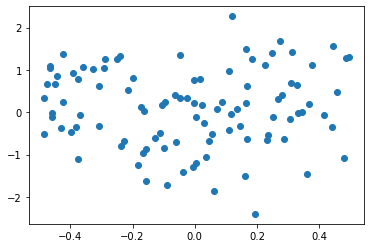

In [26]:
plt.scatter(df['X'],df['y'])

In [27]:
df['pred1']=df['y'].mean()

In [28]:
df

,X,y,pred1
0,0.248625,1.389998,0.101048
1,-0.162305,0.029118,0.101048
2,-0.441693,0.846146,0.101048
3,-0.240254,1.321074,0.101048
4,0.030138,-0.248742,0.101048
...,...,...,...
95,0.359677,-1.465467,0.101048
96,0.287195,-0.634895,0.101048
97,0.034685,-1.048480,0.101048
98,-0.308238,-0.328590,0.101048


In [29]:
df['res1']=df['y']-df['pred1']

In [30]:
df

,X,y,pred1,res1
0,0.248625,1.389998,0.101048,1.288950
1,-0.162305,0.029118,0.101048,-0.071930
2,-0.441693,0.846146,0.101048,0.745097
3,-0.240254,1.321074,0.101048,1.220026
4,0.030138,-0.248742,0.101048,-0.349790
...,...,...,...,...
95,0.359677,-1.465467,0.101048,-1.566516
96,0.287195,-0.634895,0.101048,-0.735943
97,0.034685,-1.048480,0.101048,-1.149528
98,-0.308238,-0.328590,0.101048,-0.429639


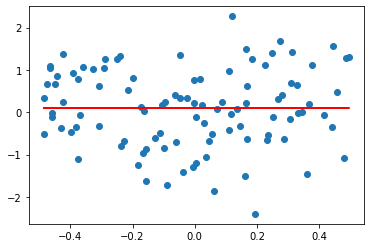

In [31]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')
plt.show()

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
tree1=DecisionTreeRegressor(max_leaf_nodes=8)

In [35]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

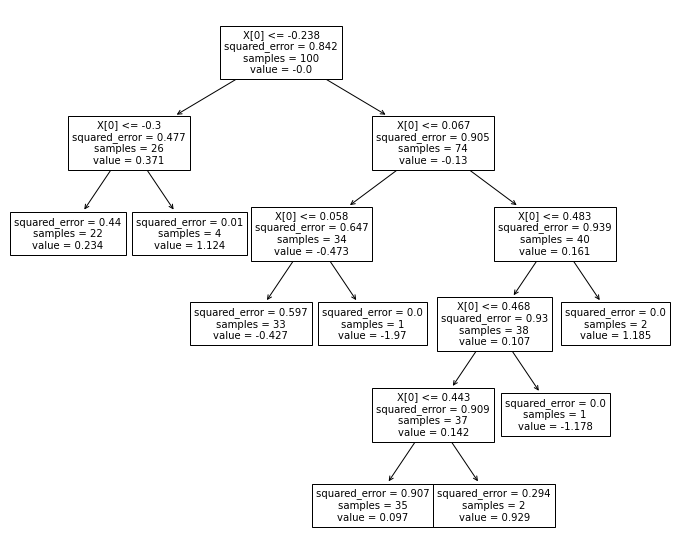

In [37]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,10))
plot_tree(tree1)
plt.show()

In [40]:
X_test=np.linspace(-0.5,0.5,500)

In [42]:
y_pred=0.101048+tree1.predict(X_test.reshape(500,1))

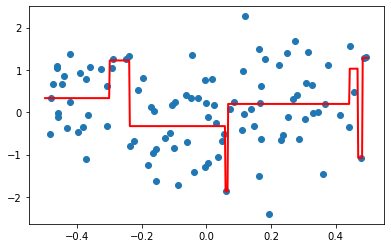

In [43]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [44]:
df['pred2']=0.101048+tree1.predict(df['X'].values.reshape(100,1))

In [45]:
df

,X,y,pred1,res1,pred2
0,0.248625,1.389998,0.101048,1.288950,0.197731
1,-0.162305,0.029118,0.101048,-0.071930,-0.326257
2,-0.441693,0.846146,0.101048,0.745097,0.334797
3,-0.240254,1.321074,0.101048,1.220026,1.224723
4,0.030138,-0.248742,0.101048,-0.349790,-0.326257
...,...,...,...,...,...
95,0.359677,-1.465467,0.101048,-1.566516,0.197731
96,0.287195,-0.634895,0.101048,-0.735943,0.197731
97,0.034685,-1.048480,0.101048,-1.149528,-0.326257
98,-0.308238,-0.328590,0.101048,-0.429639,0.334797


In [46]:
df['res2']=df['y']-df['pred2']

In [47]:
df

,X,y,pred1,res1,pred2,res2
0,0.248625,1.389998,0.101048,1.288950,0.197731,1.192266
1,-0.162305,0.029118,0.101048,-0.071930,-0.326257,0.355376
2,-0.441693,0.846146,0.101048,0.745097,0.334797,0.511348
3,-0.240254,1.321074,0.101048,1.220026,1.224723,0.096351
4,0.030138,-0.248742,0.101048,-0.349790,-0.326257,0.077515
...,...,...,...,...,...,...
95,0.359677,-1.465467,0.101048,-1.566516,0.197731,-1.663199
96,0.287195,-0.634895,0.101048,-0.735943,0.197731,-0.832626
97,0.034685,-1.048480,0.101048,-1.149528,-0.326257,-0.722222
98,-0.308238,-0.328590,0.101048,-0.429639,0.334797,-0.663388


In [48]:
tree2=DecisionTreeRegressor(max_leaf_nodes=8)

In [49]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [50]:
y_pred=0.101048+sum(regressor.predict(X_test.reshape(-1,1)) for regressor in [tree1,tree2])

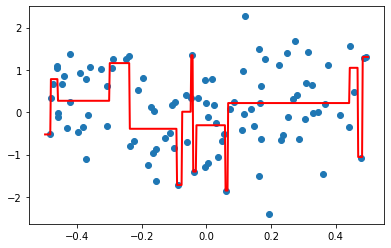

In [53]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2,color='red')
plt.scatter(df['X'],df['y'])